# 10. Time Series 

### Date and Time Data Types and Tools

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2017, 3, 18, 10, 55, 32, 578860)

In [4]:
now.year, now.month, now.day

(2017, 3, 18)

In [5]:
delta = datetime(2011,11,7) - datetime(2008,6,24,8,15)

In [6]:
delta

datetime.timedelta(1230, 56700)

In [7]:
delta.days

1230

In [8]:
delta.seconds

56700

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011,1,7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [11]:
start + timedelta(12) # 12일 추가 

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12) # 24일 빼기. 

datetime.datetime(2010, 12, 14, 0, 0)

#### Types in datetime module 
 - date : Store calendar date (year, month, day) using the Gregorian calendar.
 - time : Store time of day as hours, minutes, seconds, and microseconds
 - datetime : Stores both date and time
 - timedelta : Represents the difference between two datetime values (as days, seconds, and microseconds)

### Converting between string and datetime

In [13]:
stamp = datetime(2011,1,3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

 Converting strings to dastes using **datetime.strptime**
  - datetime.strptime is the best way to parse a date with a known format.

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value,"%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011','8/6/2011']
datestrs

['7/6/2011', '8/6/2011']

In [19]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

- especially for common date formats. In this case, you can use the parser.parse method in the third party dateutil package

In [20]:
from dateutil.parser import parse

In [21]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

 - dateutil is capable of parsing almost any human-intelligible date representation

In [22]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

 - In international locales, day appearing before month is very common, so you can pass dayfirst=True to indicate this

In [23]:
parse('6/11/2013', dayfirst=True)

datetime.datetime(2013, 11, 6, 0, 0)

 - **Pandas** is generally oriented toward working with arrays of dates. whether used as an axis index or a column in a DataFrame.

In [24]:
import pandas as pd

In [25]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [26]:
idx = pd.to_datetime(datestrs + [None])

In [27]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [28]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

|Type | Description |   
|---|---|
|%Y |4-digit year|
|%y |2-digit year|
|%m |2-digit month [01, 12]|
|%d |2-digit day [01, 31]|
|%H |Hour (24-hour clock) [00, 23]|
|%I |Hour (12-hour clock) [01, 12]|
|%M |2-digit minute [00, 59]|
|%S |Second [00, 61] (seconds 60, 61 account for leap seconds)|
|%w |Weekday as integer [0 (Sunday), 6]|
|%U |Week number of the year [00, 53]. Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”.|
|%W |Week number of the year [00, 53]. Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”.|
|%z |UTC time zone offset as +HHMM or -HHMM, empty if time zone naive|
|%F |Shortcut for %Y-%m-%d, for example 2012-4-18|
|%D |Shortcut for %m/%d/%y, for example 04/18/12|

## Time Series Basics
 - The most basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or datetime objects

In [29]:
from datetime import datetime
from pandas import Series
import numpy as np

In [30]:
%matplotlib inline

In [31]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
 datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [32]:
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [33]:
ts = Series(np.random.randn(6), index= dates)

In [34]:
ts

2011-01-02    0.570182
2011-01-05    0.779885
2011-01-07    0.740779
2011-01-08    0.595212
2011-01-10    0.148957
2011-01-12   -0.803379
dtype: float64

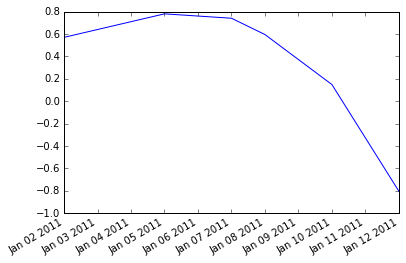

In [35]:
ts.plot()

In [36]:
type(ts)

pandas.core.series.Series

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [38]:
ts[::2] # 2개씩 뛰어넘어서 0, 2, 4 이렇게 

2011-01-02    0.570182
2011-01-07    0.740779
2011-01-10    0.148957
dtype: float64

In [39]:
ts + ts[::2]

2011-01-02    1.140363
2011-01-05         NaN
2011-01-07    1.481558
2011-01-08         NaN
2011-01-10    0.297913
2011-01-12         NaN
dtype: float64

In [40]:
ts.index.dtype

dtype('<M8[ns]')

In [41]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [42]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [43]:
ts[stamp]

0.74077893716501797

In [44]:
ts['1/10/2011']

0.14895650033778057

In [45]:
ts['2011/1/10']

0.14895650033778057

In [46]:
longer_ts = Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
longer_ts[:10]

2000-01-01    0.160916
2000-01-02    0.312660
2000-01-03   -0.670934
2000-01-04    0.836661
2000-01-05    0.224510
2000-01-06    0.042524
2000-01-07   -0.098809
2000-01-08    0.102791
2000-01-09   -0.736240
2000-01-10   -0.539601
Freq: D, dtype: float64

In [47]:
longer_ts.dtype

dtype('float64')

 - Slicing with dates works just like with a regular Series

In [48]:
longer_ts['2001'][:10] 

2001-01-01    1.517085
2001-01-02    0.889113
2001-01-03   -2.196783
2001-01-04   -0.798045
2001-01-05    1.884608
2001-01-06    1.159656
2001-01-07   -0.337036
2001-01-08    1.992916
2001-01-09   -0.549855
2001-01-10   -0.823026
Freq: D, dtype: float64

In [49]:
longer_ts['2001-05'][:10]

2001-05-01    1.372358
2001-05-02   -0.336566
2001-05-03    1.278270
2001-05-04   -0.909131
2001-05-05   -0.599360
2001-05-06   -0.124653
2001-05-07   -0.906310
2001-05-08   -1.092367
2001-05-09   -1.336839
2001-05-10    0.316725
Freq: D, dtype: float64

In [50]:
ts[datetime(2011,1,7):] # 2011-01-07 이후로 데이터 가지고 오기.

2011-01-07    0.740779
2011-01-08    0.595212
2011-01-10    0.148957
2011-01-12   -0.803379
dtype: float64

In [51]:
ts

2011-01-02    0.570182
2011-01-05    0.779885
2011-01-07    0.740779
2011-01-08    0.595212
2011-01-10    0.148957
2011-01-12   -0.803379
dtype: float64

In [52]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.740779
2011-01-08    0.595212
2011-01-10    0.148957
dtype: float64

 - There is an equivalent instance method truncate which slices a TimeSeries between two dates
 - p. 296

In [53]:
ts.truncate(after='1/9/2011')

2011-01-02    0.570182
2011-01-05    0.779885
2011-01-07    0.740779
2011-01-08    0.595212
dtype: float64

In [54]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED') # 수요일마다 일주일씩 반복. 100개.
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [55]:
from pandas import DataFrame

In [56]:
long_df = DataFrame(np.random.randn(100, 4),
     index=dates,
     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.565473,0.599768,-2.000131,-0.088810
2000-01-12,-0.008534,-0.488498,-1.101935,0.293692
2000-01-19,-0.452500,-0.575202,0.959472,0.201681
2000-01-26,-0.884719,-1.395842,-0.942417,-2.373422
2000-02-02,1.716517,-0.584389,0.495022,0.027723


In [57]:
long_df.ix['5-2001'] # 2001년 5월 데이터만.

,Colorado,Texas,New York,Ohio
2001-05-02,-0.761174,-0.536488,-1.926462,0.684708
2001-05-09,0.900374,0.686107,-2.667597,-0.786281
2001-05-16,0.315698,-0.088799,-0.526384,-1.266123
2001-05-23,-0.987177,0.394071,0.267573,-0.800816
2001-05-30,1.490290,-0.979761,-0.956455,-0.281512


## Time Series with Duplicate Indices

In [58]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
  '1/3/2000'])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [59]:
dup_ts = Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [60]:
dup_ts.index.is_unique

False

In [61]:
dup_ts['1/3/2000'] # not duplicated

4

In [62]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

#### Aggregate the data with index(having non-unique timestamps) 
 - level = 0 (the only level of indexing)

In [63]:
grouped = dup_ts.groupby(level=0)

In [64]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [65]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [66]:
ts

2011-01-02    0.570182
2011-01-05    0.779885
2011-01-07    0.740779
2011-01-08    0.595212
2011-01-10    0.148957
2011-01-12   -0.803379
dtype: float64

In [67]:
ts.resample('D') # ??????

2011-01-02    0.570182
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.779885
2011-01-06         NaN
2011-01-07    0.740779
2011-01-08    0.595212
2011-01-09         NaN
2011-01-10    0.148957
2011-01-11         NaN
2011-01-12   -0.803379
Freq: D, dtype: float64

In [68]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [69]:
pd.date_range(start='4/1/2012', periods=20) #시작일 기준으로 뒤로 20일.

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range(end='6/1/2012', periods=20) #맨 마지막을 기준으로 앞으로 20일

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

#### Index containing the last businessday of each month 

In [71]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')  # freq = 'BM' 

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [72]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [73]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True) # Midnight conversion option 'normalize = True'

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date Offsets

In [74]:
from pandas.tseries.offsets import Hour, Minute

In [75]:
hour = Hour()
hour

<Hour>

In [76]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [77]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h') # 4시간 씩.

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [78]:
Hour(2) + Minute(30) # 150 Minutes

<150 * Minutes>

In [79]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

|Alias |Offset Type |Description|
|--------|-------|--------|
|D |Day |Calendar daily|
|B |BusinessDay |Business daily|
|H |Hour |Hourly|
|T or min| Minute| Minutely|
|S |Second |Secondly|
|L or ms| Milli |Millisecond (1/1000th of 1 second)|
|U |Micro |Microsecond (1/1000000th of 1 second)|
|M |Month | End Last calendar day of month|
|BM |Business Month End | Last business day (weekday) of month |
|MS | Month Begin| First calendar day of month|
|BMS | Business Month Begin |First weekday of month|
|W-MON, W-TUE, ...| Week | Weekly on given day of week: MON, TUE, WED, THU, FRI, SAT,or SUN.|
|WOM-1MON, WOM-2MON, ... |WeekOfMonth |Generate weekly dates in the first, second, third, or fourth week of the month. For example, WOM-3FRI for the 3rd Friday of each month.|
|Q-JAN, Q-FEB, ... |QuarterEnd |Quarterly dates anchored on last calendar day of each month, for year ending in indicated month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.|
|BQ-JAN, BQ-FEB, ... |Business Quarter End| Quarterly dates anchored on last weekday day of each month, for year ending in indicated month|
|QS-JAN, QS-FEB, ... |Quarter Begin| Quarterly dates anchored on first calendar day of each month, for year ending in indicated month|
|BQS-JAN, BQS-FEB, ... |Business Quarter Begin| Quarterly dates anchored on first weekday day of each month,for year ending in indicated month|
|A-JAN, A-FEB, ... |Year End| Annual dates anchored on last calendar day of given month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.|
|BA-JAN, BA-FEB, ... |Business Year End| Annual dates anchored on last weekday of given month|
|AS-JAN, AS-FEB, ... |Year Begin| Annual dates anchored on first day of given month|
|BAS-JAN, BAS-FEB, ... |Business Year Begin| Annual dates anchored on first weekday of given month|

### Week of month dates
 - “week of month”, starting with WOM. This enables you to get dates like the third Friday of each month:

In [80]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Shifting (Leading and Lagging) Data

In [81]:
ts = Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.002199
2000-02-29   -1.081816
2000-03-31    0.142086
2000-04-30   -0.633846
Freq: M, dtype: float64

 - 값만 2칸 Shift

In [82]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.002199
2000-04-30   -1.081816
Freq: M, dtype: float64

In [83]:
ts.shift(-2)

2000-01-31    0.142086
2000-02-29   -0.633846
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [84]:
ts.shift(2, freq='M') # 달을 2달 shift 

2000-03-31   -0.002199
2000-04-30   -1.081816
2000-05-31    0.142086
2000-06-30   -0.633846
Freq: M, dtype: float64

In [85]:
ts.shift(3, freq='D') # 3일씩 Index Shift

2000-02-03   -0.002199
2000-03-03   -1.081816
2000-04-03    0.142086
2000-05-03   -0.633846
dtype: float64

In [86]:
ts.shift(1, freq='3D') # 3d일씩

2000-02-03   -0.002199
2000-03-03   -1.081816
2000-04-03    0.142086
2000-05-03   -0.633846
dtype: float64

In [87]:
ts.shift(1, freq='90T') # 1시간 30분

2000-01-31 01:30:00   -0.002199
2000-02-29 01:30:00   -1.081816
2000-03-31 01:30:00    0.142086
2000-04-30 01:30:00   -0.633846
Freq: M, dtype: float64

### Shifting dates with offsets

In [88]:
from pandas.tseries.offsets import Day, MonthEnd 

In [89]:
now = datetime(2011,11,17)
now

datetime.datetime(2011, 11, 17, 0, 0)

In [90]:
now + 3 * Day() # 3일 추가.

Timestamp('2011-11-20 00:00:00')

In [91]:
now + MonthEnd() # 해당 달의 마지막날로 이동.

Timestamp('2011-11-30 00:00:00')

In [92]:
now + MonthEnd(2) # 다음달 마지막날로 

Timestamp('2011-12-31 00:00:00')

Anchored offsets can explicitly “roll” dates forward or backward using their rollfor
ward and rollback methods, respectively:

In [93]:
offset = MonthEnd()
offset

<MonthEnd>

In [94]:
offset.rollforward(now) # 뒤로 적용. 

Timestamp('2011-11-30 00:00:00')

In [95]:
offset.rollback(now) # 앞으로 적용.

Timestamp('2011-10-31 00:00:00')

In [96]:
ts = Series(np.random.randn(20), 
            index = pd.date_range('1/15/2000',periods=20, freq='4d'))
ts # 4일씩 20개 .

2000-01-15    1.211632
2000-01-19   -1.589940
2000-01-23   -1.565707
2000-01-27    0.135073
2000-01-31    1.253635
2000-02-04   -0.560466
2000-02-08   -0.974853
2000-02-12    0.231288
2000-02-16   -0.574097
2000-02-20    0.575618
2000-02-24    0.772495
2000-02-28    0.278140
2000-03-03    0.447220
2000-03-07   -0.777911
2000-03-11   -0.421962
2000-03-15    0.545041
2000-03-19   -0.782883
2000-03-23    0.292229
2000-03-27   -0.510554
2000-03-31    0.195321
Freq: 4D, dtype: float64

In [97]:
ts.groupby(offset.rollforward).mean() # 각 월말로 groupby

2000-01-31   -0.111061
2000-02-29   -0.035982
2000-03-31   -0.126688
dtype: float64

In [98]:
ts.groupby(offset.rollforward)

In [99]:
ts.resample('M').mean()

-0.09124364939325753

## Periods and Period Arithmetic
 - Periods represent time spans, like days, months, quarters, or years. The Period class represents this data type, requiring a string or integer and a frequency from the above table

In [100]:
p = pd.Period(2007, freq='A-DEC') # January - December
p

Period('2007', 'A-DEC')

In this case, the Period object represents **the full timespan from January 1, 2007 to December 31, 2007, inclusive**. Conveniently, adding and subtracting integers from periods has the effect of shifting by their frequency:

In [101]:
p + 5

Period('2012', 'A-DEC')

In [102]:
p - 2

Period('2005', 'A-DEC')

In [103]:
pd.Period('2014', freq='A-DEC') - p

7

In [104]:
rng = pd.period_range('1/1/2000','6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [105]:
rng[0]

Period('2000-01', 'M')

In [106]:
Series(np.random.randn(6), index=rng)

2000-01    1.273951
2000-02   -0.545378
2000-03   -1.150995
2000-04   -1.357151
2000-05    0.532607
2000-06   -0.923834
Freq: M, dtype: float64

In [107]:
values = ['2001Q3', '2002Q2', '2003Q1']
values

['2001Q3', '2002Q2', '2003Q1']

In [108]:
index = pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

## Period Frequency Conversion
- Periods and PeriodIndex objects can be converted to another frequency using their as freq method

In [109]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [110]:
p + 2

Period('2009', 'A-DEC')

In [111]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [112]:
p.asfreq('M', how='start') + 1

Period('2007-02', 'M')

In [113]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [114]:
p.asfreq('M', how='end') + 1

Period('2008-01', 'M')

In [115]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [116]:
p + 1

Period('2008', 'A-JUN')

In [117]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [118]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [119]:
p = pd.Period('2007-08', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [120]:
rng = pd.period_range('2006','2009',freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='int64', freq='A-DEC')

In [121]:
ts = Series(np.random.randn(len(rng)),index=rng)
ts

2006   -1.273143
2007   -1.541351
2008    0.419972
2009    0.260447
Freq: A-DEC, dtype: float64

In [122]:
ts.asfreq('M',how='start')

2006-01   -1.273143
2007-01   -1.541351
2008-01    0.419972
2009-01    0.260447
Freq: M, dtype: float64

In [123]:
ts.asfreq('M',how='end')

2006-12   -1.273143
2007-12   -1.541351
2008-12    0.419972
2009-12    0.260447
Freq: M, dtype: float64

![Period](1.PNG)

### Quarterly Period Frequencies

In [124]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [125]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [126]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [127]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [128]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

![Period](2.PNG)

p310

 - Generating Quarterly ranges works 

In [130]:
rng = pd.period_range('2011Q3','2012Q4', freq='Q-JAN')
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='int64', freq='Q-JAN')

In [131]:
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [132]:
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s') + 16 * 60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='int64', freq='T')

## Converting Timestamps to ePeriods ( and Back )

In [133]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [136]:
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-31   -1.038657
2000-02-29    1.039035
2000-03-31    0.576611
Freq: M, dtype: float64

In [137]:
pts = ts.to_period()
pts

2000-01   -1.038657
2000-02    1.039035
2000-03    0.576611
Freq: M, dtype: float64

## Creating a PeriodIndex from Arrays

In [139]:
data = pd.read_csv('ch08/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [140]:
data.year[:5]

0    1959
1    1959
2    1959
3    1959
4    1960
Name: year, dtype: float64

In [141]:
data.quarter[:5]

0    1
1    2
2    3
3    4
4    1
Name: quarter, dtype: float64

In [142]:
index = pd.PeriodIndex(year=data.year, quarter = data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')

In [143]:
data.index = index

In [144]:
data.infl[:5]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

## Resampling and Frequency Conversion 

In [146]:
rng = pd.date_range('1/1/2000', periods=100,freq='D')
rng[:5]

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [147]:
ts = Series(np.random.randn(len(rng)), index=rng)
ts[:5]

2000-01-01   -0.272902
2000-01-02    0.782284
2000-01-03   -0.835029
2000-01-04    0.843457
2000-01-05    0.306739
Freq: D, dtype: float64

In [148]:
ts.resample('M', how='mean')

2000-01-31    0.063382
2000-02-29    0.108541
2000-03-31   -0.187815
2000-04-30   -0.276742
Freq: M, dtype: float64

In [149]:
ts.resample('M', how='mean', kind='period')

2000-01    0.063382
2000-02    0.108541
2000-03   -0.187815
2000-04   -0.276742
Freq: M, dtype: float64

## Downsampling 

In [152]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [153]:
ts = Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [154]:
ts.resample('5min',how='sum')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [155]:
ts.resample('5min',how='sum', closed='left')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

## Time Series Plotting 

In [160]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [161]:
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [162]:
close_px = close_px.resample('B',fill_method='ffill')
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


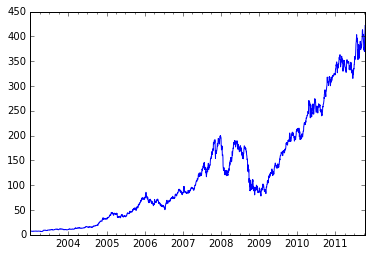

In [163]:
close_px['AAPL'].plot()

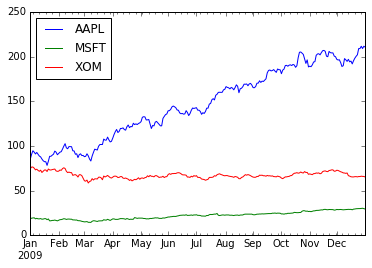

In [164]:
close_px.ix['2009'].plot()

### Moving Window Functions 
 - 이평선 : rolling_mean()

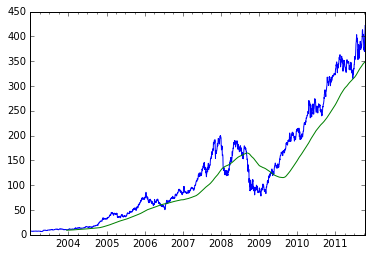

In [165]:
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL,250).plot()

In [166]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)

In [167]:
appl_std250[:20]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
2003-01-20    0.132011
2003-01-21    0.149286
2003-01-22    0.169008
2003-01-23    0.168760
2003-01-24    0.184135
2003-01-27    0.182546
2003-01-28    0.178117
2003-01-29    0.181870
Freq: B, Name: AAPL, dtype: float64

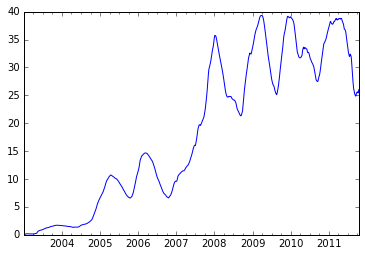

In [168]:
appl_std250.plot()

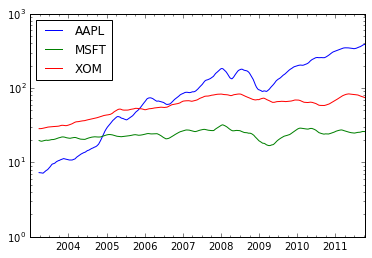

In [169]:
pd.rolling_mean(close_px,60).plot(logy=True)

## Exponentially-weighted functions 

In [170]:
import matplotlib.pyplot as plt

In [173]:
aapl_px = close_px.AAPL['2005':'2009']
ma60 = pd.rolling_mean(aapl_px,60, min_periods=50)
ewma60 = pd.ewma(aapl_px,span=60)

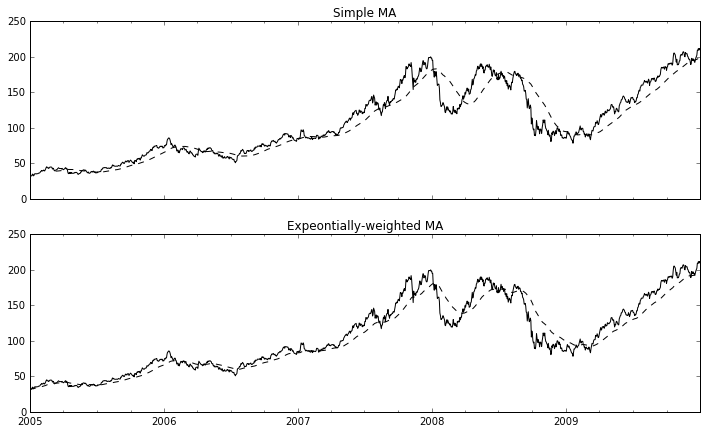

In [175]:
fig, axes = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=True, figsize=(12,7))
aapl_px.plot(style='k-', ax = axes[0])
ma60.plot(style='k--',ax=axes[0])
aapl_px.plot(style='k-', ax = axes[1])
ewma60.plot(style='k--',ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Expeontially-weighted MA')